### The Battle of New York's Boroughs
#### IBM Data Science capstone project

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

### Download and Explore Dataset

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
neighborhoods.to_csv(r'/home/usistema/Documentos/Data Science/IBM Data Science Professional Certificate/Applied data science capstone/neighboroods.csv')
print('csv exported')

csv exported


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Map of New York and location of its neighborhoods

In [12]:
nymap = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=1,
        parse_html=False).add_to(nymap) 

nymap

In [13]:
# Borughs in new york
print(neighborhoods['Borough'].unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


creating individual datafarmes for the corresponding boroughs

In [14]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
staten_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)

In [15]:
print('Bronx:', bronx_data.shape)
print('Manhattan:', manhattan_data.shape)
print('Brooklyn:', brooklyn_data.shape)
print('Queens:', queens_data.shape)
print('Staten:', staten_data.shape)

Bronx: (52, 4)
Manhattan: (40, 4)
Brooklyn: (70, 4)
Queens: (81, 4)
Staten: (63, 4)


In [16]:
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Geographical coordinates of New York boroughs

In [17]:
geolocator = Nominatim(user_agent="ny_explorer")

bronx_address = 'Bronx, NY'
bronx_location = geolocator.geocode(bronx_address)
bronx_latitude = location.latitude
bronx_longitude = location.longitude

manhattan_address = 'Manhattan, NY'
manhattan_location = geolocator.geocode(manhattan_address)
manhattan_latitude = location.latitude
manhattan_longitude = location.longitude

brooklyn_address = 'Brooklyn, NY'
brooklyn_location = geolocator.geocode(brooklyn_address)
brooklyn_latitude = location.latitude
brooklyn_longitude = location.longitude

queens_address = 'Queens, NY'
queens_location = geolocator.geocode(queens_address)
queens_latitude = location.latitude
queens_longitude = location.longitude

staten_address = 'Staten Island, NY'
staten_location = geolocator.geocode(staten_address)
staten_latitude = location.latitude
staten_longitude = location.longitude

#### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'TDQMJK3XNUQI0OZOWSBZCED02JBCALMPK0DY1ZRXHAW2LPXR' # your Foursquare ID
CLIENT_SECRET = 'E1AZT3BYD0MDKS5GP1PHAWCMATNPD2BD1CJEOHUCNWZCEUV2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
         return categories_list[0]['name']

### Explore Neighborhoods in New York's Boroughs

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )
staten_venues = getNearbyVenues(names=staten_data['Neighborhood'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                                  )


Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights
Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery 

In [22]:
print(bronx_venues.shape)
bronx_venues.head()

(1203, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
4,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station


In [23]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3298, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [24]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2776, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [25]:
print(queens_venues.shape)
queens_venues.head()

(2106, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym


In [31]:
queens_venues.to_csv(r'/home/usistema/Documentos/Data Science/IBM Data Science Professional Certificate/Applied data science capstone/queens.csv')

In [26]:
print(staten_venues.shape)
staten_venues.head()

(835, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
3,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
4,St. George,40.644982,-74.079353,Nike Factory Store,40.645753,-74.077702,Sporting Goods Shop


In [33]:
print('There are {} uniques categories of venues in the Bronx.'.format(len(bronx_venues['Venue Category'].unique())))
print('There are {} uniques categories of venues in Manhattan.'.format(len(manhattan_venues['Venue Category'].unique())))
print('There are {} uniques categories of venues in Brooklyn.'.format(len(brooklyn_venues['Venue Category'].unique())))
print('There are {} uniques categories of venues in Queens.'.format(len(queens_venues['Venue Category'].unique())))
print('There are {} uniques categories of venues in Staten Island.'.format(len(staten_venues['Venue Category'].unique())))

There are 175 uniques categories of venues in the Bronx.
There are 337 uniques categories of venues in Manhattan.
There are 284 uniques categories of venues in Brooklyn.
There are 266 uniques categories of venues in Queens.
There are 185 uniques categories of venues in Staten Island.


### One hot encoding (Dummy variables creation and venue category frequency)

In [27]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Museum,Music Venue,Nightclub,Optical Shop,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wine Shop,Wings Joint,Women's Store
0,Allerton,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.000000,0.0,0.058824,0.0,0.0,0.000000,0.0,0.0,0.029412,0.000000,0.058824,0.0,0.000000,0.0,0.0,0.000000,0.029412,0.0,0.0,0.088235,0.029412,0.029412,0.000000,0.029412,0.0,0.0,0.0,0.0,0.029412,0.000000,0.029412,0.0,0.029412,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.029412,0.0,0.0,0.029412,0.000000,0.0,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.029412,0.029412,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.029412,0.000000,0.147059,0.0,0.029412,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.029412,0.029412,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Baychester,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047619,0.000000,0.047619,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.047619,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.047619,0.0,0.0,0.0,0.0,0.095238,0.000000,0.047619,0.0,0.047619,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.047619,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.000000,0.0,0.000000,0.000000,0.047619,

In [28]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store

In [29]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Resta

In [30]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Arverne,0.0,0.000000,0.0,0.0,0.0000

In [31]:
# Manhattan one hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
staten_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Event Service,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Laundromat,Lawyer,Liquor Store,Locksmith,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Professional & Other Places,Pub,Racetrack,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoothie Shop,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Annadale,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0

In [39]:
staten_grouped.to_csv(r'/home/usistema/Documentos/Data Science/IBM Data Science Professional Certificate/Applied data science capstone/statengrouped.csv')

#### A function to sort the venues in descending order.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns
bcolumns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        bcolumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        bcolumns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bronx_neighborhoods_venues_sorted = pd.DataFrame(columns=bcolumns)
bronx_neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    bronx_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

#Manhattan
mcolumns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        mcolumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        mcolumns.append('{}th Most Common Venue'.format(ind+1))

manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=mcolumns)
manhattan_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

#Brooklyn
rcolumns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        rcolumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        rcolumns.append('{}th Most Common Venue'.format(ind+1))

brooklyn_neighborhoods_venues_sorted = pd.DataFrame(columns=rcolumns)
brooklyn_neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    brooklyn_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)  

#Queens
qcolumns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        qcolumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        qcolumns.append('{}th Most Common Venue'.format(ind+1))

queens_neighborhoods_venues_sorted = pd.DataFrame(columns=qcolumns)
queens_neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    queens_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

#Staten Island
scolumns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        scolumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        scolumns.append('{}th Most Common Venue'.format(ind+1))

staten_neighborhoods_venues_sorted = pd.DataFrame(columns=scolumns)
staten_neighborhoods_venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    staten_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

In [34]:
bronx_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Chinese Restaurant,Bus Station,Supermarket,Playground,Fast Food Restaurant,Breakfast Spot,Martial Arts Dojo,Spanish Restaurant
1,Baychester,Donut Shop,Baseball Field,Electronics Store,Laundromat,Supermarket,Sandwich Place,Mexican Restaurant,Spanish Restaurant,Bank,Pet Store
2,Bedford Park,Diner,Chinese Restaurant,Mexican Restaurant,Convenience Store,Pizza Place,Deli / Bodega,Sandwich Place,Spanish Restaurant,Supermarket,Park
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Donut Shop,Liquor Store,Bank,Mexican Restaurant,Shoe Store
4,Bronxdale,Spanish Restaurant,Bank,Pizza Place,Cosmetics Shop,Performing Arts Venue,Paper / Office Supplies Store,Chinese Restaurant,Eastern European Restaurant,Mexican Restaurant,Breakfast Spot


In [35]:
manhattan_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Wine Shop,Clothing Store,Gym,Women's Store,Memorial Site,Boat or Ferry,Pizza Place
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Yoga Studio,Bakery,Gym,Bookstore,Café,Japanese Restaurant,Wine Shop
2,Central Harlem,African Restaurant,Bar,American Restaurant,Seafood Restaurant,French Restaurant,Chinese Restaurant,Tapas Restaurant,Spa,Cosmetics Shop,Beer Bar
3,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Ice Cream Shop,Wine Shop,Theater,American Restaurant,Hotel,Nightclub,Bookstore
4,Chinatown,Chinese Restaurant,American Restaurant,Cocktail Bar,Salon / Barbershop,Spa,Optical Shop,Bakery,Vietnamese Restaurant,Hotpot Restaurant,Asian Restaurant


In [36]:
brooklyn_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pharmacy,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Donut Shop,Bubble Tea Shop,Sushi Restaurant,Pizza Place,Kebab Restaurant,Coffee Shop
1,Bay Ridge,Italian Restaurant,Pizza Place,Spa,Greek Restaurant,Bar,American Restaurant,Bagel Shop,Chinese Restaurant,Sushi Restaurant,Pharmacy
2,Bedford Stuyvesant,Café,Deli / Bodega,Pizza Place,Bar,Coffee Shop,Fried Chicken Joint,Japanese Restaurant,Bus Stop,Boutique,New American Restaurant
3,Bensonhurst,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Donut Shop,Bakery,Italian Restaurant,Pharmacy,Grocery Store,Cha Chaan Teng,Supermarket
4,Bergen Beach,Harbor / Marina,Baseball Field,Donut Shop,Playground,Hockey Field,Athletics & Sports,Factory,Falafel Restaurant,Farm,Farmers Market


In [37]:
queens_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Donut Shop,Wine Shop,Playground,Beach,Pizza Place,Thai Restaurant,Board Shop
1,Astoria,Bar,Middle Eastern Restaurant,Hookah Bar,Greek Restaurant,Seafood Restaurant,Bakery,Pizza Place,Mediterranean Restaurant,Food & Drink Shop,Café
2,Astoria Heights,Chinese Restaurant,Deli / Bodega,Hostel,Plaza,Playground,Pizza Place,Italian Restaurant,Burger Joint,Bowling Alley,Bus Station
3,Auburndale,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Supermarket,Furniture / Home Store,Noodle House,Korean Restaurant,Miscellaneous Shop,Athletics & Sports,Toy / Game Store
4,Bay Terrace,Clothing Store,Women's Store,Donut Shop,Lingerie Store,American Restaurant,Mobile Phone Shop,Cosmetics Shop,Kids Store,Deli / Bodega,Coffee Shop


In [38]:
staten_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Dance Studio,Train Station,Sushi Restaurant,Pharmacy,Restaurant,Sports Bar,Diner,Discount Store,Food
1,Arden Heights,Deli / Bodega,Bus Stop,Home Service,Pizza Place,Coffee Shop,Pharmacy,Yoga Studio,Fast Food Restaurant,Food & Drink Shop,Food
2,Arlington,Bus Stop,Deli / Bodega,Boat or Ferry,Grocery Store,Intersection,American Restaurant,Art Museum,Gastropub,Furniture / Home Store,French Restaurant
3,Arrochar,Deli / Bodega,Italian Restaurant,Bus Stop,Taco Place,Liquor Store,Mediterranean Restaurant,Middle Eastern Restaurant,Food Truck,Outdoors & Recreation,Pharmacy
4,Bay Terrace,Supermarket,Insurance Office,Plaza,Italian Restaurant,Sushi Restaurant,Donut Shop,Liquor Store,Salon / Barbershop,Shipping Store,Farmers Market


### Cluster Neighborhoods

In [39]:
# number of clusters
kclusters = 7
bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)
# run k-means clustering
bronx_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)
bronx_kmeans.labels_

array([4, 0, 4, 4, 4, 4, 4, 2, 3, 4, 2, 4, 1, 4, 2, 4, 4, 5, 4, 2, 4, 4,
       4, 0, 4, 4, 4, 0, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 3, 4, 2, 3, 4,
       4, 4, 2, 2, 2, 4, 6, 4], dtype=int32)

In [40]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
manhattan_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
manhattan_kmeans.labels_ 

array([1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       3, 1, 6, 2, 1, 1, 2, 0, 5, 1, 1, 2, 1, 1, 1, 2, 1, 1], dtype=int32)

In [41]:
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)
brooklyn_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)
brooklyn_kmeans.labels_

array([6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 2, 5, 6, 5, 5, 0, 6, 6, 6, 5,
       5, 1, 0, 6, 5, 6, 6, 0, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 4, 6, 5, 6, 6, 3, 5, 5, 6, 6, 5, 0, 0, 6, 6, 5, 6, 6, 5,
       6, 5, 5, 6], dtype=int32)

In [42]:
queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)
queens_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)
queens_kmeans.labels_

array([4, 4, 4, 4, 4, 4, 6, 4, 1, 1, 4, 1, 0, 1, 4, 5, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1,
       4, 1, 1, 2, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [43]:
staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)
staten_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)
staten_kmeans.labels_ 

array([4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 1, 4, 4, 4, 1, 0, 4, 2, 0, 0, 4, 0,
       4, 4, 0, 4, 1, 1, 4, 0, 4, 0, 4, 4, 4, 5, 4, 0, 4, 5, 4, 4, 0, 3,
       1, 4, 4, 4, 4, 3, 4, 4, 4, 3, 6, 4, 4, 4, 4, 4, 0, 4], dtype=int32)

10 most common venues for each neighborhood.

In [44]:
# Bronx
# add clustering labels
bronx_neighborhoods_venues_sorted.insert(0, 'Cluster', bronx_kmeans.labels_)
bronx_merged = bronx_data
# merge to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(bronx_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# Manhattan
manhattan_neighborhoods_venues_sorted.insert(0, 'Cluster', manhattan_kmeans.labels_)
manhattan_merged = manhattan_data
manhattan_merged = manhattan_merged.join(manhattan_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# Brooklyn
brooklyn_neighborhoods_venues_sorted.insert(0, 'Cluster', brooklyn_kmeans.labels_)
brooklyn_merged = brooklyn_data
brooklyn_merged = brooklyn_merged.join(brooklyn_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# Queens
queens_neighborhoods_venues_sorted.insert(0, 'Cluster', queens_kmeans.labels_)
queens_merged = queens_data
queens_merged = queens_merged.join(queens_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# Staten Island
staten_neighborhoods_venues_sorted.insert(0, 'Cluster', staten_kmeans.labels_)
staten_merged = staten_data
staten_merged = staten_merged.join(staten_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [45]:
bronx_merged.dropna(axis=0, inplace=True)
bronx_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,2,Ice Cream Shop,Sandwich Place,Gas Station,Caribbean Restaurant,Laundromat,Donut Shop,Pharmacy,Dessert Shop,Distillery,Dive Bar
1,Bronx,Co-op City,40.874294,-73.829939,4,Bus Station,Baseball Field,Trail,Fast Food Restaurant,Mattress Store,Fried Chicken Joint,Salon / Barbershop,Chinese Restaurant,Bagel Shop,Grocery Store
2,Bronx,Eastchester,40.887556,-73.827806,2,Caribbean Restaurant,Deli / Bodega,Diner,Bus Station,Metro Station,Food & Drink Shop,Fast Food Restaurant,Bowling Alley,Seafood Restaurant,Chinese Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,5,Plaza,Bus Station,River,Music Venue,Dog Run,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,3,Park,Plaza,Food Truck,Home Service,Bus Station,Gym,Baseball Field,Bank,Eastern European Restaurant,Fish Market


In [46]:
manhattan_merged.dropna(axis=0, inplace=True)
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Coffee Shop,Sandwich Place,American Restaurant,Kids Store,Bank,Supplement Shop,Gym,Miscellaneous Shop,Donut Shop,Shopping Mall
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,American Restaurant,Cocktail Bar,Salon / Barbershop,Spa,Optical Shop,Bakery,Vietnamese Restaurant,Hotpot Restaurant,Asian Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Café,Bakery,Grocery Store,Mobile Phone Shop,Spanish Restaurant,Deli / Bodega,Chinese Restaurant,Mexican Restaurant,Tapas Restaurant,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Lounge,Café,Pizza Place,Restaurant,Bakery,Park,Chinese Restaurant,American Restaurant,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Pizza Place,Café,Park,Coffee Shop,Mexican Restaurant,Yoga Studio,Bakery,Sandwich Place,Cocktail Bar,School


In [47]:
brooklyn_merged.dropna(axis=0, inplace=True)
brooklyn_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,5,Italian Restaurant,Pizza Place,Spa,Greek Restaurant,Bar,American Restaurant,Bagel Shop,Chinese Restaurant,Sushi Restaurant,Pharmacy
1,Brooklyn,Bensonhurst,40.611009,-73.995180,6,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Donut Shop,Bakery,Italian Restaurant,Pharmacy,Grocery Store,Cha Chaan Teng,Supermarket
3,Brooklyn,Greenpoint,40.730201,-73.954241,5,Bar,Pizza Place,Cocktail Bar,Coffee Shop,Yoga Studio,Café,Mexican Restaurant,French Restaurant,Record Shop,New American Restaurant
4,Brooklyn,Gravesend,40.595260,-73.973471,6,Pizza Place,Chinese Restaurant,Bus Station,Martial Arts Dojo,Lounge,Bakery,Gym,Diner,Pharmacy,Donut Shop
5,Brooklyn,Brighton Beach,40.576825,-73.965094,6,Restaurant,Russian Restaurant,Beach,Eastern European Restaurant,Gourmet Shop,Sushi Restaurant,Bank,Pharmacy,Mobile Phone Shop,Fast Food Restaurant


In [48]:
queens_merged.dropna(axis=0, inplace=True)
queens_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,4,Bar,Middle Eastern Restaurant,Hookah Bar,Greek Restaurant,Seafood Restaurant,Bakery,Pizza Place,Mediterranean Restaurant,Food & Drink Shop,Café
2,Queens,Jackson Heights,40.751981,-73.882821,4,Latin American Restaurant,South American Restaurant,Peruvian Restaurant,Bakery,Mobile Phone Shop,Diner,Mexican Restaurant,Thai Restaurant,Pizza Place,Clothing Store
3,Queens,Elmhurst,40.744049,-73.881656,4,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Sushi Restaurant,Snack Place,Bubble Tea Shop,Seafood Restaurant,Sandwich Place
4,Queens,Howard Beach,40.654225,-73.838138,4,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Pharmacy,Gym,Bagel Shop,Chinese Restaurant,Tapas Restaurant,Clothing Store,Sushi Restaurant
5,Queens,Corona,40.742382,-73.856825,4,Deli / Bodega,Mexican Restaurant,Bakery,Ice Cream Shop,Juice Bar,Pizza Place,Restaurant,Donut Shop,Sandwich Place,Park


In [49]:
# staten_merged.drop(['ClusterL', 'Cluster Labels'], axis=1, inplace =True)
staten_merged.dropna(axis=0, inplace=True)
staten_merged[('Cluster')] = staten_merged[('Cluster')].astype(int)
staten_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,4,Clothing Store,American Restaurant,Sporting Goods Shop,Italian Restaurant,Bar,Park,Thai Restaurant,Monument / Landmark,Burger Joint,Farmers Market
1,Staten Island,New Brighton,40.640615,-74.087017,0,Bus Stop,Park,Deli / Bodega,Bowling Alley,Discount Store,Playground,Food Truck,Food & Drink Shop,Food,Flower Shop
2,Staten Island,Stapleton,40.626928,-74.077902,4,Sandwich Place,Pizza Place,Restaurant,Bank,Discount Store,Mexican Restaurant,Café,Cosmetics Shop,Performing Arts Venue,Residential Building (Apartment / Condo)
3,Staten Island,Rosebank,40.615305,-74.069805,4,Italian Restaurant,Grocery Store,Deli / Bodega,Pharmacy,Cajun / Creole Restaurant,Sandwich Place,Restaurant,Cosmetics Shop,Discount Store,Pizza Place
4,Staten Island,West Brighton,40.631879,-74.107182,4,Coffee Shop,Bank,Italian Restaurant,Music Store,Pharmacy,Bar,Japanese Restaurant,Bus Stop,Café,Sandwich Place


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Identifying clusters
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
# Identifying clusters
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)        
        
# Identifying clusters
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
    
# Identifying clusters
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)

# Identifying clusters
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['Neighborhood'], staten_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
    
        
map_clusters

### Exploring the biggest clusters of each Borough, creation of Wordclouds

In [51]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#### Bronx

In [52]:
bronx_merged['Cluster'].value_counts()

4    32
2    11
3     3
0     3
6     1
5     1
1     1
Name: Cluster, dtype: int64

In [53]:
bronxc = bronx_merged.loc[bronx_merged['Cluster'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]
bronxc2 = bronx_merged.loc[bronx_merged['Cluster'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

In [54]:
#Counter(bronxc)
vals, counts = np.unique(bronxc, return_counts=True)
bresults = dict(zip(vals, counts))
b = sorted(bresults.items(), key=lambda x: x[1], reverse=True)    
print(b)


[('Pizza Place', 27), ('Bank', 15), ('Sandwich Place', 13), ('Donut Shop', 12), ('Fast Food Restaurant', 12), ('Pharmacy', 11), ('Mexican Restaurant', 10), ('Supermarket', 10), ('Chinese Restaurant', 9), ('Deli / Bodega', 9), ('Bus Station', 8), ('Spanish Restaurant', 8), ('Grocery Store', 7), ('Italian Restaurant', 6), ('Bakery', 5), ('Bar', 5), ('Convenience Store', 5), ('Diner', 5), ('Fried Chicken Joint', 5), ('Latin American Restaurant', 5), ('Liquor Store', 5), ('Mobile Phone Shop', 4), ('Park', 4), ('Burger Joint', 3), ('Café', 3), ('Check Cashing Service', 3), ('Coffee Shop', 3), ('Cosmetics Shop', 3), ('Fish Market', 3), ('Martial Arts Dojo', 3), ('Restaurant', 3), ('Shoe Store', 3), ('Spa', 3), ('American Restaurant', 2), ('Asian Restaurant', 2), ('Breakfast Spot', 2), ('Discount Store', 2), ('Eastern European Restaurant', 2), ('Farmers Market', 2), ('Fish & Chips Shop', 2), ('Flower Shop', 2), ('Food Truck', 2), ('Gym / Fitness Center', 2), ('Indian Restaurant', 2), ('Juice 

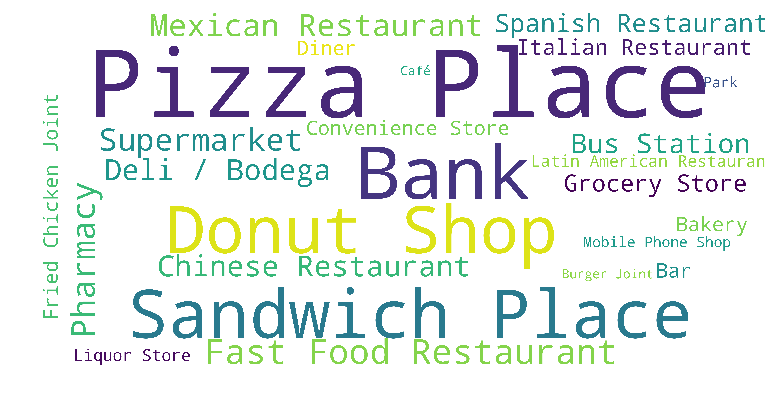

In [55]:
bronxwc = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bresults)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(bronxwc)
plt.axis('off')
plt.show()

In [56]:
vals, counts = np.unique(bronxc2, return_counts=True)
b2results = dict(zip(vals, counts))
b2 = sorted(b2results.items(), key=lambda x: x[1], reverse=True)    
print(b2)

[('Bus Station', 8), ('Donut Shop', 7), ('Deli / Bodega', 6), ('Sandwich Place', 6), ('Caribbean Restaurant', 5), ('Chinese Restaurant', 5), ('Pizza Place', 5), ('Supermarket', 5), ('Bakery', 4), ('Fried Chicken Joint', 4), ('Pharmacy', 4), ('Basketball Court', 3), ('Grocery Store', 3), ('Metro Station', 3), ('Spanish Restaurant', 3), ('Bank', 2), ('Bus Stop', 2), ('Latin American Restaurant', 2), ('Laundromat', 2), ('Liquor Store', 2), ('Park', 2), ('Playground', 2), ('Bowling Alley', 1), ('Breakfast Spot', 1), ('Burger Joint', 1), ('Bus Line', 1), ('Claremont Village', 1), ('Clothing Store', 1), ('Coffee Shop', 1), ('Concourse', 1), ('Construction & Landscaping', 1), ('Convenience Store', 1), ('Dessert Shop', 1), ('Diner', 1), ('Distillery', 1), ('Dive Bar', 1), ('Eastchester', 1), ('Electronics Store', 1), ('Fast Food Restaurant', 1), ('Food', 1), ('Food & Drink Shop', 1), ('Gas Station', 1), ('Gym', 1), ('High  Bridge', 1), ('Hookah Bar', 1), ('Ice Cream Shop', 1), ('Lounge', 1), (

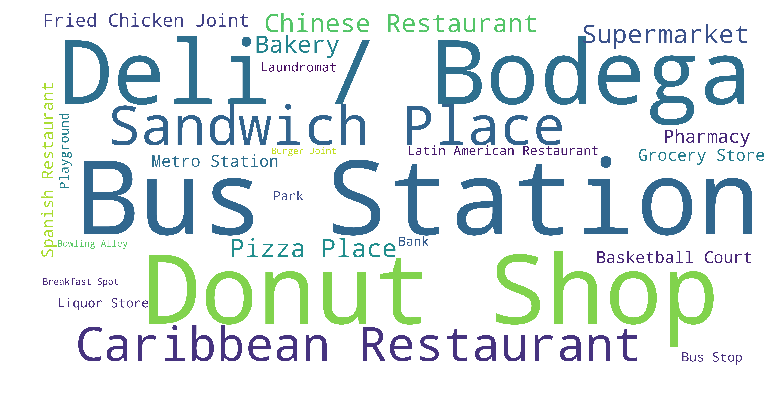

In [57]:
bronxwc2 = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(b2results)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(bronxwc2)
plt.axis('off')
plt.show()

#### Manhattan

In [58]:
manhattan_merged['Cluster'].value_counts()

1    23
2    10
0     3
6     1
5     1
4     1
3     1
Name: Cluster, dtype: int64

In [59]:
manhattanc = manhattan_merged.loc[manhattan_merged['Cluster'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
manhattanc2 = manhattan_merged.loc[manhattan_merged['Cluster'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


In [60]:
vals, counts = np.unique(manhattanc, return_counts=True)
mresults = dict(zip(vals, counts))
m = sorted(mresults.items(), key=lambda x: x[1], reverse=True)    
print(m)

[('Coffee Shop', 20), ('Italian Restaurant', 18), ('American Restaurant', 12), ('Gym / Fitness Center', 11), ('Bakery', 9), ('Café', 9), ('Hotel', 9), ('Gym', 8), ('Pizza Place', 7), ('Wine Shop', 7), ('Cocktail Bar', 6), ('Japanese Restaurant', 6), ('Bar', 5), ('French Restaurant', 5), ('Park', 5), ('Theater', 5), ('Wine Bar', 5), ('Bookstore', 4), ('Spa', 4), ('Sushi Restaurant', 4), ('Chinese Restaurant', 3), ('Clothing Store', 3), ('Grocery Store', 3), ('Ice Cream Shop', 3), ('Mexican Restaurant', 3), ('Sandwich Place', 3), ('Yoga Studio', 3), ('Cosmetics Shop', 2), ('Diner', 2), ('Food Truck', 2), ('New American Restaurant', 2), ('Salon / Barbershop', 2), ('Sporting Goods Shop', 2), ('Steakhouse', 2), ('Art Gallery', 1), ('Asian Restaurant', 1), ('Bagel Shop', 1), ('Battery Park City', 1), ('Beer Bar', 1), ('Beer Garden', 1), ('Boat or Ferry', 1), ('Burger Joint', 1), ('Carnegie Hill', 1), ('Chelsea', 1), ('Chinatown', 1), ('Civic Center', 1), ('Clinton', 1), ('Comedy Club', 1), (

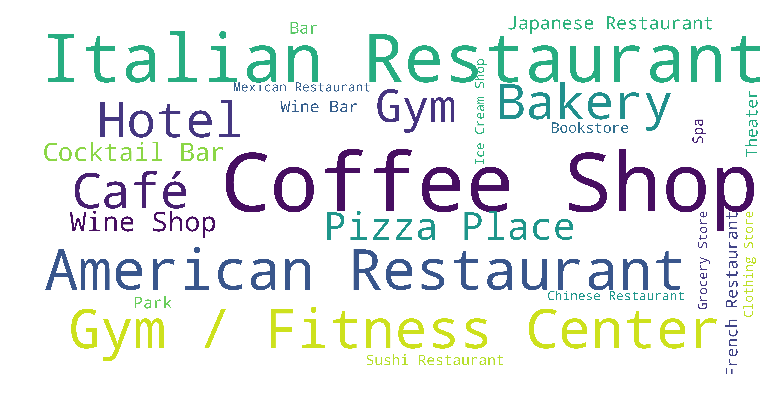

In [61]:
manhattanwc = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(mresults)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(manhattanwc)
plt.axis('off')
plt.show()

In [62]:
vals, counts = np.unique(manhattanc2, return_counts=True)
m2results = dict(zip(vals, counts))
m2 = sorted(m2results.items(), key=lambda x: x[1], reverse=True)    
print(m2)

[('Coffee Shop', 8), ('Café', 7), ('Mexican Restaurant', 7), ('Park', 7), ('Pizza Place', 7), ('Deli / Bodega', 6), ('Bakery', 5), ('Sandwich Place', 3), ('American Restaurant', 2), ('Chinese Restaurant', 2), ('Cocktail Bar', 2), ('Greek Restaurant', 2), ('Thai Restaurant', 2), ('Yoga Studio', 2), ('Art Gallery', 1), ('Asian Restaurant', 1), ('Bar', 1), ('Beer Bar', 1), ('Bike Trail', 1), ('Bookstore', 1), ('Bridge', 1), ('Bubble Tea Shop', 1), ('Burger Joint', 1), ('Cuban Restaurant', 1), ('Diner', 1), ('East Harlem', 1), ('Farmers Market', 1), ('Food Truck', 1), ('Frozen Yogurt Shop', 1), ('Furniture / Home Store', 1), ('Garden', 1), ('Gas Station', 1), ('Grocery Store', 1), ('Hamilton Heights', 1), ('Ice Cream Shop', 1), ('Indian Restaurant', 1), ('Inwood', 1), ('Italian Restaurant', 1), ('Japanese Curry Restaurant', 1), ('Japanese Restaurant', 1), ('Latin American Restaurant', 1), ('Lounge', 1), ('Lower East Side', 1), ('Manhattan Valley', 1), ('Manhattanville', 1), ('Metro Station

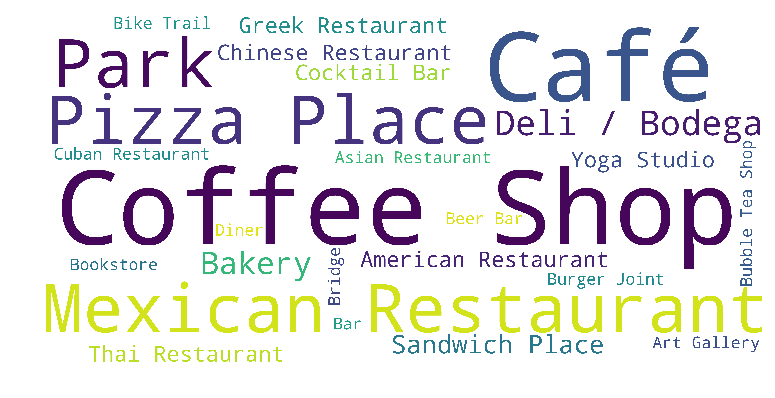

In [63]:
manhattanwc2 = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(m2results)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(manhattanwc2)
plt.axis('off')
plt.show()

#### Brooklyn

In [64]:
brooklyn_merged['Cluster'].value_counts()

6    19
5    16
0     3
2     1
1     1
Name: Cluster, dtype: int64

In [68]:
brooklync = brooklyn_merged.loc[brooklyn_merged['Cluster'] == 6, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]
brooklync2 = brooklyn_merged.loc[brooklyn_merged['Cluster'] == 5, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

In [69]:
vals, counts = np.unique(brooklync, return_counts=True)
brresults = dict(zip(vals, counts))
br = sorted(brresults.items(), key=lambda x: x[1], reverse=True)    
print(br)

[('Donut Shop', 12), ('Pharmacy', 12), ('Chinese Restaurant', 9), ('Pizza Place', 9), ('Bank', 6), ('Fast Food Restaurant', 5), ('Fried Chicken Joint', 5), ('Supermarket', 5), ('Sushi Restaurant', 5), ('Bakery', 4), ('Caribbean Restaurant', 4), ('Deli / Bodega', 4), ('Bagel Shop', 3), ('Diner', 3), ('Farmers Market', 3), ('Grocery Store', 3), ('Gym / Fitness Center', 3), ('Ice Cream Shop', 3), ('Liquor Store', 3), ('Mexican Restaurant', 3), ('Restaurant', 3), ('Sandwich Place', 3), ("Women's Store", 3), ('Baseball Field', 2), ('Bubble Tea Shop', 2), ('Burger Joint', 2), ('Coffee Shop', 2), ('Convenience Store', 2), ('Gas Station', 2), ('Italian Restaurant', 2), ('Latin American Restaurant', 2), ('Mobile Phone Shop', 2), ('Music Venue', 2), ('Park', 2), ('Plaza', 2), ('Spanish Restaurant', 2), ('Asian Restaurant', 1), ('Athletics & Sports', 1), ('Bath Beach', 1), ('Beach', 1), ('Bensonhurst', 1), ('Bergen Beach', 1), ('Big Box Store', 1), ('Borough Park', 1), ('Breakfast Spot', 1), ('Br

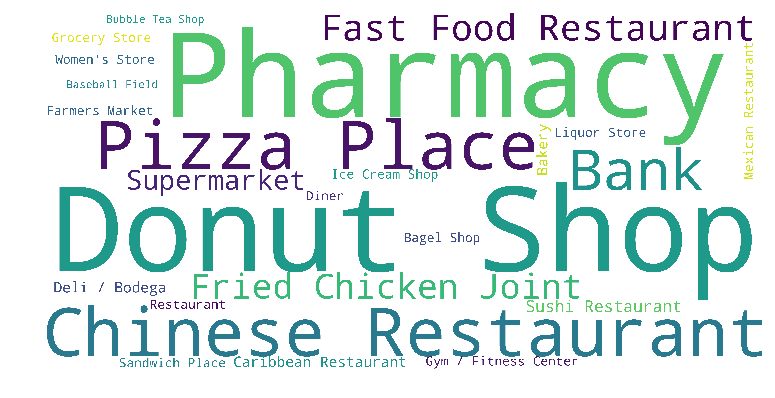

In [70]:
brooklynwc = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(brresults)

fig = plt.figure()
fig.set_figwidth(13)
fig.set_figheight(17)

plt.imshow(brooklynwc)
plt.axis('off')
plt.show()

In [71]:
vals, counts = np.unique(brooklync2, return_counts=True)
br2results = dict(zip(vals, counts))
br2 = sorted(br2results.items(), key=lambda x: x[1], reverse=True)    
print(br2)

[('Pizza Place', 14), ('Coffee Shop', 12), ('Bar', 11), ('Italian Restaurant', 9), ('Bakery', 7), ('Café', 6), ('Deli / Bodega', 5), ('Ice Cream Shop', 5), ('Mexican Restaurant', 5), ('Yoga Studio', 5), ('Cocktail Bar', 4), ('French Restaurant', 4), ('Park', 4), ('American Restaurant', 3), ('Gym / Fitness Center', 3), ('Japanese Restaurant', 3), ('Playground', 3), ('Sandwich Place', 3), ('Scenic Lookout', 3), ('Spa', 3), ('Chinese Restaurant', 2), ('Furniture / Home Store', 2), ('Gym', 2), ('New American Restaurant', 2), ('Sushi Restaurant', 2), ('Thai Restaurant', 2), ('Wine Shop', 2), ('Art Gallery', 1), ('Arts & Crafts Store', 1), ('Bagel Shop', 1), ('Bay Ridge', 1), ('Bedford Stuyvesant', 1), ('Boerum Hill', 1), ('Boutique', 1), ('Brooklyn Heights', 1), ('Burger Joint', 1), ('Bus Stop', 1), ('Bushwick', 1), ('Caribbean Restaurant', 1), ('Carroll Gardens', 1), ('Clinton Hill', 1), ('Cobble Hill', 1), ('Convenience Store', 1), ('Cosmetics Shop', 1), ('Dance Studio', 1), ('Discount St

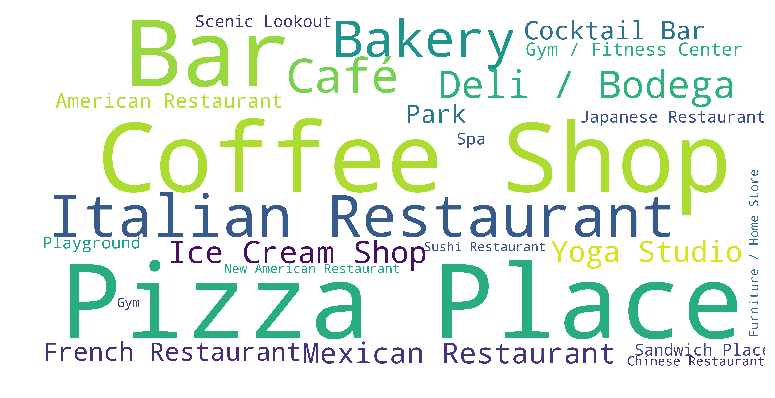

In [72]:
brooklynwc2 = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(br2results)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(brooklynwc2)
plt.axis('off')
plt.show()

#### Queens

In [73]:
queens_merged['Cluster'].value_counts()

4    28
1     9
6     1
5     1
0     1
Name: Cluster, dtype: int64

In [74]:
queensc = queens_merged.loc[queens_merged['Cluster'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]
queensc2 = queens_merged.loc[queens_merged['Cluster'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

In [75]:
vals, counts = np.unique(queensc, return_counts=True)
qresults = dict(zip(vals, counts))
q = sorted(qresults.items(), key=lambda x: x[1], reverse=True)    
print(q)

[('Pizza Place', 18), ('Chinese Restaurant', 9), ('Donut Shop', 9), ('Bakery', 8), ('Deli / Bodega', 7), ('Fast Food Restaurant', 7), ('Ice Cream Shop', 7), ('Sandwich Place', 7), ('Italian Restaurant', 6), ('Mexican Restaurant', 6), ('Supermarket', 6), ('Mobile Phone Shop', 5), ('Pharmacy', 5), ('American Restaurant', 4), ('Bank', 4), ('Clothing Store', 4), ('Coffee Shop', 4), ('Grocery Store', 4), ('Gym', 4), ('Gym / Fitness Center', 4), ('Park', 4), ('Seafood Restaurant', 4), ('Thai Restaurant', 4), ('Asian Restaurant', 3), ('Bar', 3), ('Bus Station', 3), ('Café', 3), ('Diner', 3), ('Electronics Store', 3), ('Falafel Restaurant', 3), ('Farm', 3), ('Playground', 3), ('Sushi Restaurant', 3), ('Bagel Shop', 2), ('Brewery', 2), ('Bubble Tea Shop', 2), ('Burger Joint', 2), ('Cosmetics Shop', 2), ('Dessert Shop', 2), ('Empanada Restaurant', 2), ('Event Space', 2), ('Flea Market', 2), ('Flower Shop', 2), ('Food & Drink Shop', 2), ('Fried Chicken Joint', 2), ('Gift Shop', 2), ('Greek Restau

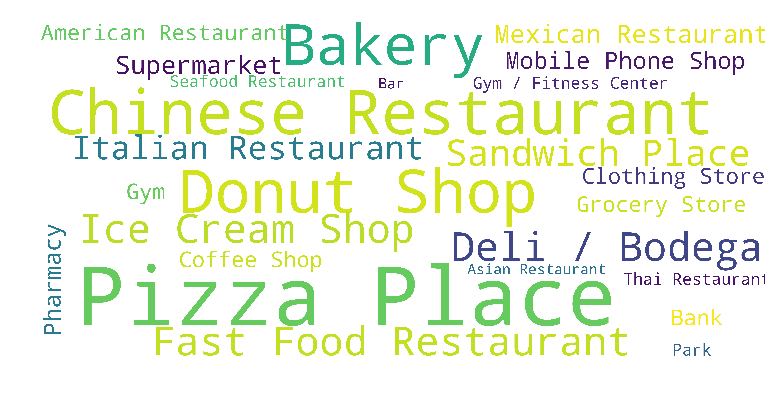

In [76]:
queenswc = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(qresults)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(queenswc)
plt.axis('off')
plt.show()

In [77]:
vals, counts = np.unique(queensc2, return_counts=True)
q2results = dict(zip(vals, counts))
q2 = sorted(q2results.items(), key=lambda x: x[1], reverse=True)    
print(q2)

[('Bus Station', 6), ('Deli / Bodega', 5), ('Chinese Restaurant', 4), ('Fast Food Restaurant', 3), ('Pharmacy', 3), ('Beach', 2), ('Coffee Shop', 2), ('Convenience Store', 2), ('Diner', 2), ('Donut Shop', 2), ('Event Space', 2), ('Food Truck', 2), ('Fried Chicken Joint', 2), ('Grocery Store', 2), ('Gym / Fitness Center', 2), ('Indian Restaurant', 2), ('Intersection', 2), ('Moving Target', 2), ('Playground', 2), ('Restaurant', 2), ('Antique Shop', 1), ('Arts & Crafts Store', 1), ('Bagel Shop', 1), ('Bakery', 1), ('Bar', 1), ('Baseball Field', 1), ('Bellaire', 1), ('Belle Harbor', 1), ('Blissville', 1), ('Boutique', 1), ('Briarwood', 1), ('Building', 1), ('Bus Stop', 1), ('Cambria Heights', 1), ('Caribbean Restaurant', 1), ('Clothing Store', 1), ('Construction & Landscaping', 1), ('Cosmetics Shop', 1), ('Discount Store', 1), ('Dog Run', 1), ('Electronics Store', 1), ('Falafel Restaurant', 1), ('Farm', 1), ('Farmers Market', 1), ('Flower Shop', 1), ('Fresh Meadows', 1), ('Greek Restaurant

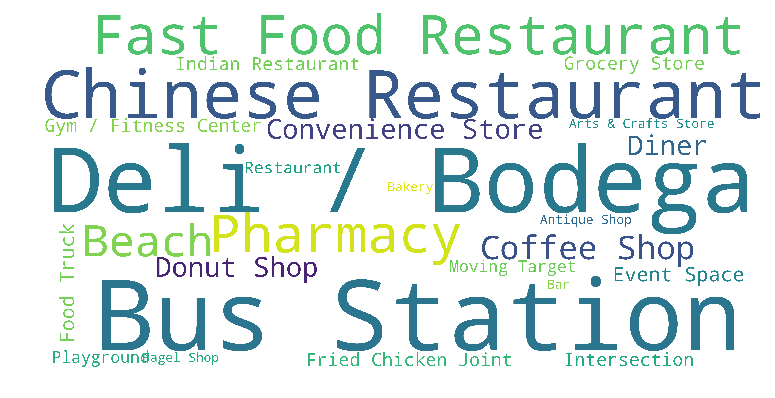

In [78]:
queenswc2 = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(q2results)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(queenswc2)
plt.axis('off')
plt.show()

#### Staten Island

In [79]:
staten_merged['Cluster'].value_counts()

4    38
0    12
1     5
3     3
5     2
6     1
2     1
Name: Cluster, dtype: int64

In [80]:
statenc = staten_merged.loc[staten_merged['Cluster'] == 4, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]
statenc2 = staten_merged.loc[staten_merged['Cluster'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

In [81]:
vals, counts = np.unique(statenc, return_counts=True)
sresults = dict(zip(vals, counts))
s = sorted(sresults.items(), key=lambda x: x[1], reverse=True)    
print(s)

[('Pizza Place', 21), ('Deli / Bodega', 16), ('Italian Restaurant', 15), ('Pharmacy', 13), ('Bus Stop', 12), ('Sandwich Place', 11), ('Liquor Store', 10), ('Food', 9), ('Coffee Shop', 8), ('Donut Shop', 8), ('Food & Drink Shop', 8), ('Restaurant', 8), ('Chinese Restaurant', 7), ('Bagel Shop', 6), ('Bank', 6), ('Café', 6), ('Cosmetics Shop', 6), ('Fast Food Restaurant', 6), ('Food Truck', 6), ('Mexican Restaurant', 6), ('Bar', 5), ('Diner', 5), ('Farmers Market', 5), ('Grocery Store', 5), ('Park', 5), ('Sushi Restaurant', 5), ('Yoga Studio', 5), ('Convenience Store', 4), ('Discount Store', 4), ('French Restaurant', 4), ('Home Service', 4), ('Japanese Restaurant', 4), ('Supermarket', 4), ('American Restaurant', 3), ('Athletics & Sports', 3), ('Beach', 3), ('Burger Joint', 3), ('Dry Cleaner', 3), ('Fish & Chips Shop', 3), ('Gift Shop', 3), ('Sporting Goods Shop', 3), ('Accessories Store', 2), ('Baseball Field', 2), ('Business Service', 2), ('Cajun / Creole Restaurant', 2), ('Clothing Stor

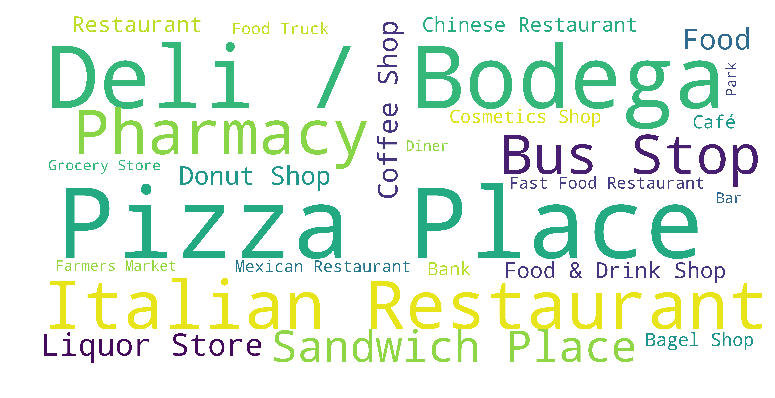

In [82]:
statenwc = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(sresults)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(statenwc)
plt.axis('off')
plt.show()

In [83]:
vals, counts = np.unique(statenc2, return_counts=True)
s2results = dict(zip(vals, counts))
s2 = sorted(s2results.items(), key=lambda x: x[1], reverse=True)    
print(s2)

[('Bus Stop', 12), ('Food', 9), ('Food & Drink Shop', 9), ('Food Truck', 9), ('Flower Shop', 7), ('Yoga Studio', 7), ('Deli / Bodega', 5), ('Fast Food Restaurant', 5), ('Park', 4), ('Fish & Chips Shop', 3), ('French Restaurant', 3), ('Italian Restaurant', 3), ('American Restaurant', 2), ('Bagel Shop', 2), ('Boat or Ferry', 2), ('Discount Store', 2), ('Filipino Restaurant', 2), ('Grocery Store', 2), ('Intersection', 2), ('Pizza Place', 2), ('Playground', 2), ('Sandwich Place', 2), ('Arlington', 1), ('Art Museum', 1), ('Athletics & Sports', 1), ('Bank', 1), ('Bloomfield', 1), ('Bowling Alley', 1), ('Chinese Restaurant', 1), ('Coffee Shop', 1), ('Cosmetics Shop', 1), ('Dog Run', 1), ('Elm Park', 1), ('Farmers Market', 1), ('Financial or Legal Service', 1), ('Fox Hills', 1), ('Furniture / Home Store', 1), ('Gastropub', 1), ('Graniteville', 1), ('Grasmere', 1), ('Grymes Hill', 1), ('Gym / Fitness Center', 1), ('Home Service', 1), ('Hotel', 1), ('IT Services', 1), ('Ice Cream Shop', 1), ('Ja

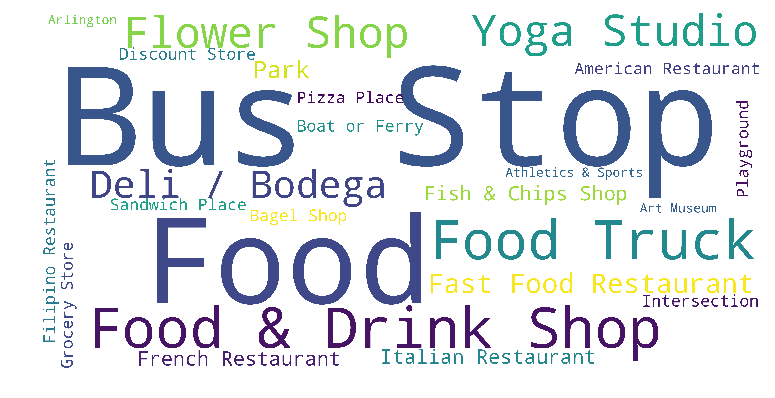

In [84]:
statenwc2 = WordCloud(background_color="white", scale=23, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(s2results)

fig = plt.figure()
fig.set_figwidth(13) # set width
fig.set_figheight(17)

plt.imshow(statenwc2)
plt.axis('off')
plt.show()